
|  |  |
| - | - |
| ![](Nobel_Prize.png) | The Nobel Prize has been among the most prestigious awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize. The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. | 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nobel_df = pd.read_csv('data/nobel.csv')
nobel_df.shape

(1000, 18)

In [31]:
# get an initial view of the 18 columns
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,is_us
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900,False


### What is the most commonly awarded gender and birth country?

_(Store your answers as string variables top_gender and top_country)_

In [5]:
# count total awards for each gender
nobel_df['sex'].value_counts()

Male      905
Female     65
Name: sex, dtype: int64

In [29]:
# use if logic to define variable 
gender_counts = nobel_df['sex'].value_counts()

if gender_counts['Female'] > gender_counts['Male']:
    top_gender = 'Female'
else:
    top_gender = 'Male'

print(top_gender)

Male


### Nobel Prize Winners by Gender Over Time

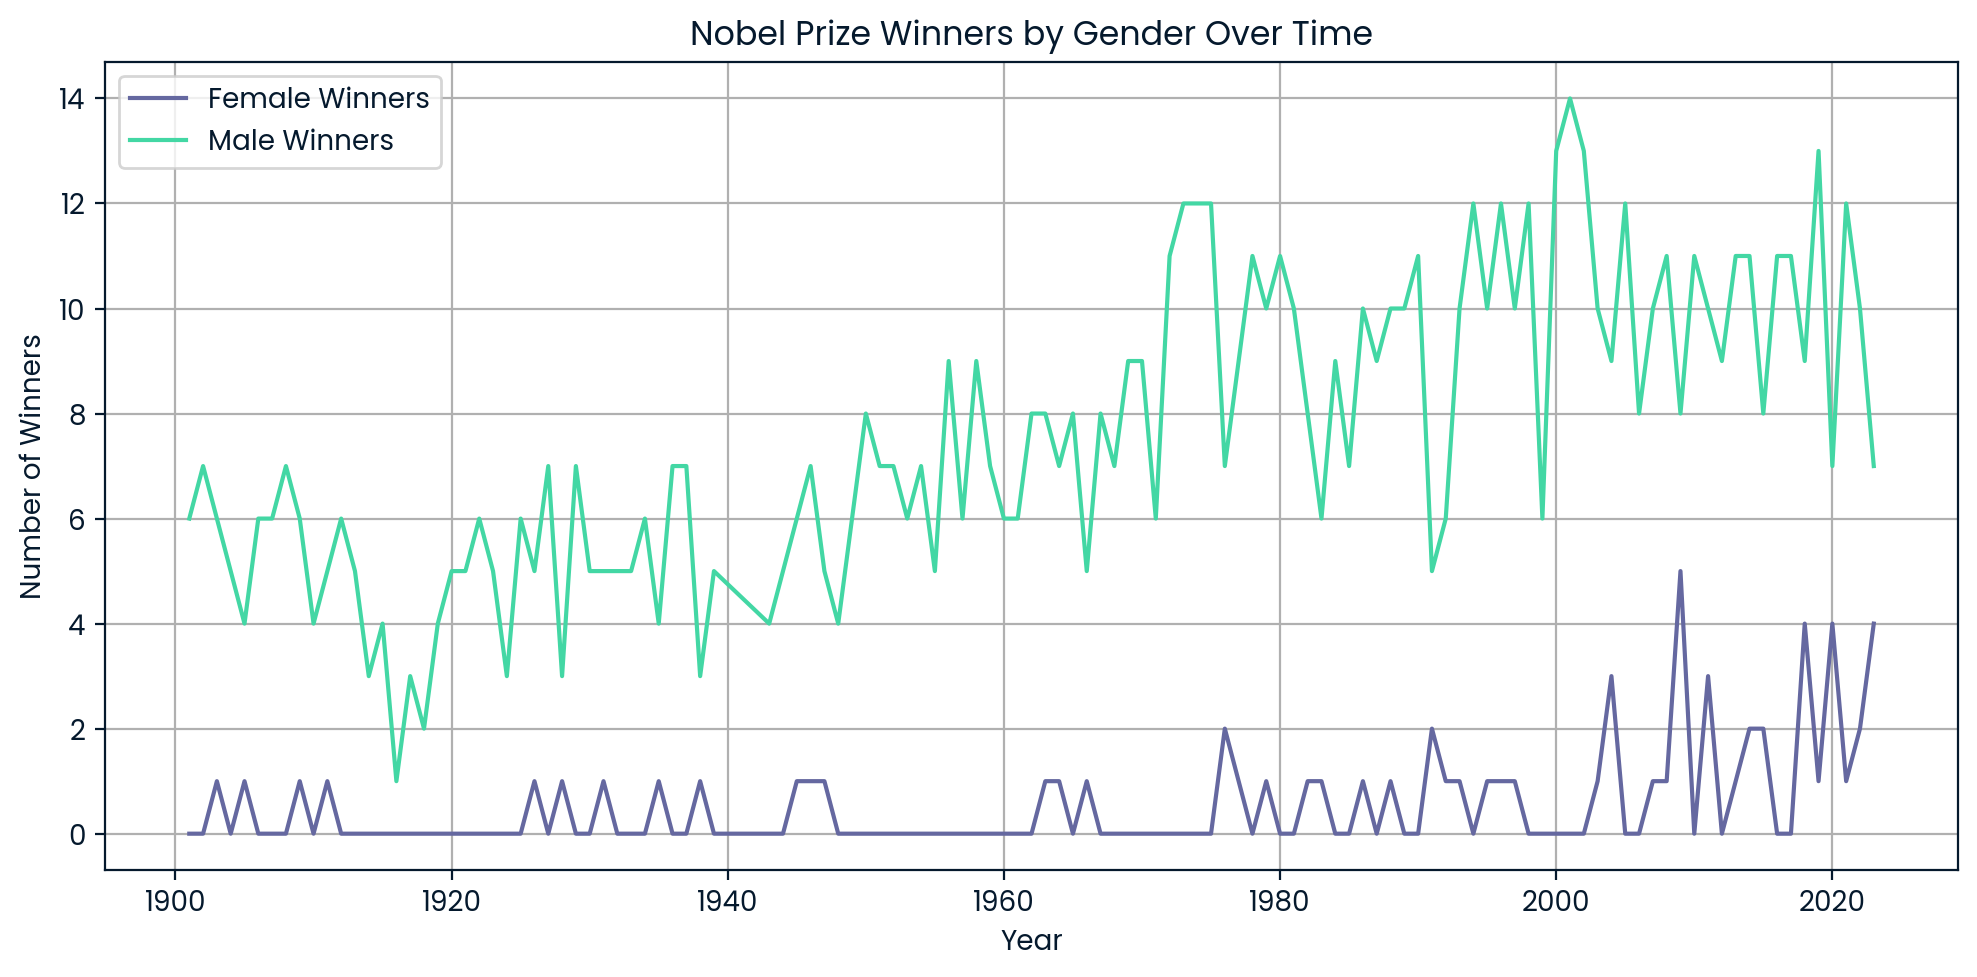

In [43]:
# create a pivot table for plotting
nobel_df.pivot_table(index='year', columns='sex', aggfunc='size', fill_value=0)

#plotting winners by gender over years
plt.figure(figsize=(10, 5))

sns.lineplot(x=gender_by_year.index, y=gender_by_year['Female'], label='Female Winners')
sns.lineplot(x=gender_by_year.index, y=gender_by_year['Male'], label='Male Winners')

plt.title("Nobel Prize Winners by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Winners")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# count total awards for each birth country
nobel_df['birth_country'].value_counts().head(3)

United States of America    291
United Kingdom               91
Germany                      67
Name: birth_country, dtype: int64

Just learned the `.idxmax` series method, which seems ideal. 

In [9]:
# select the top country by medals won
top_country = nobel_df['birth_country'].value_counts().idxmax()
print(top_country)

United States of America


### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

_(Store this as an integer called max_decade_usa)_

In [10]:
# we need to add a decade column, we can use each row's year awarded to determine decade with floor division
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# select a random row to check the above
nobel_df.iloc[364][['year','decade']]

year      1965
decade    1960
Name: 364, dtype: object

In [11]:
# work out the total count of US winners and rest of world winners
us_count = (nobel_df['birth_country'] == 'United States of America').sum()
rest_count = (nobel_df['birth_country'] != 'United States of America').sum()

# work out the percent of US to ROW winners
us_percent = int(us_count / rest_count * 100)
print(f"American-born recipients account for {us_percent}% of all winners.")


American-born recipients account for 41% of all winners.


Now lets find the strongest ratio by decade.

In [12]:
# create a boolean 'is_us' column - so we are working with 1s and 0s
nobel_df['is_us'] = nobel_df['birth_country'] == 'United States of America'

# group by decade and calculate US share per decade
us_by_decade = nobel_df.groupby('decade')['is_us'].mean() * 100

# show top decades
us_by_decade.sort_values(ascending=False).head(3)

decade
2000    42.276423
1990    40.384615
2020    36.000000
Name: is_us, dtype: float64

In [13]:
# create the required variables
max_decade_usa = int((nobel_df.groupby('decade')['is_us'].mean()*100).idxmax())
print(max_decade_usa)

2000


### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

_(Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.)_

In [14]:
# calculate female share per (decade, category) group
female_share = nobel_df.groupby(['decade', 'category'])['sex'].apply(lambda x: (x == 'Female').mean())

# find the group with the highest female share
max_idx = female_share.idxmax()  

# store dictionary
max_female_dict = {max_idx[0]: max_idx[1]}

print(max_female_dict)

{2020: 'Literature'}


### Who was the first woman to receive a Nobel Prize, and in what category?  
_(Save your string answers as first_woman_name and first_woman_category.)_

In [15]:
# filtering female laureates
female_df = nobel_df[nobel_df['sex'] == 'Female']

# find the earliest year awarded
earliest_year = female_df['year'].min()

# filter to the rows matching that year
first_female = female_df[female_df['year'] == earliest_year]

# create variables
first_woman_name = first_female['full_name'].iloc[0]
first_woman_category = first_female['category'].iloc[0]

print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

_(Store the full names in a list named repeat_list.)_

In [16]:
# 
wins_by_winner = nobel_df['full_name'].value_counts()
repeat_list = wins_by_winner[wins_by_winner > 1].index.tolist()

print(repeat_list)



['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
